In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df =pd.read_csv("/datc/opschaler/smartmeter_data/export_P01S01W5339.csv",header=0,delimiter=";",parse_dates=['Timestamp', 'gasTimestamp'])

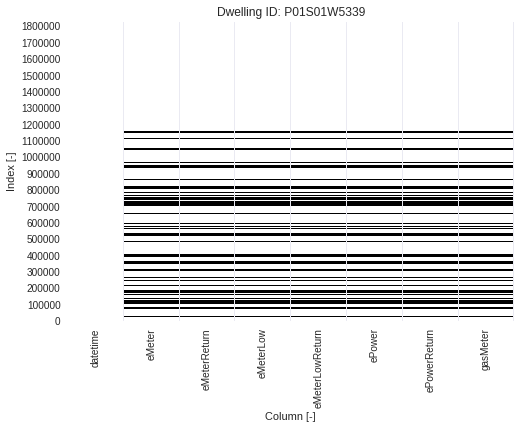

In [10]:
def plotnans (df):
    df = df.rename(index=str, columns={"Timestamp":"datetime"})
    df = df.set_index(['datetime'])
    df = df.resample('10s').mean()
    df = df.reset_index()
    df = df.isnull() 
    #ticks = round(int(len(df)*0.1) /10000)
    fig = sns.heatmap(df, cmap='gray_r', yticklabels = 100000, cbar = False)
    fig.invert_yaxis()
    fig.set(xlabel='Column [-]', ylabel='Index [-]')
    plt.title('Dwelling ID: P01S01W5339')
    fig = fig.get_figure()
    plt.savefig('test_nans_vis_sensor_whole_5339.png')
    return fig

plotnans(df)
#need to save fig using dwelling id
#See loading_combining_smart_gas_weather_generalized at def save_df how to do so